In [142]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import timedelta
import numpy as np

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set()

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [85]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [ ]:
#df['date'] = [d.date() for d in df['login_time']]
#df['time'] = [d.time() for d in df['login_time']]
#df = df.drop('login_time', axis=1)
#df.head()

In [86]:
df.login_time = pd.to_datetime(df.login_time)
df.set_index('login_time', inplace=True)
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [53]:
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [55]:
df_15min = df.resample('15min').count()
df_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


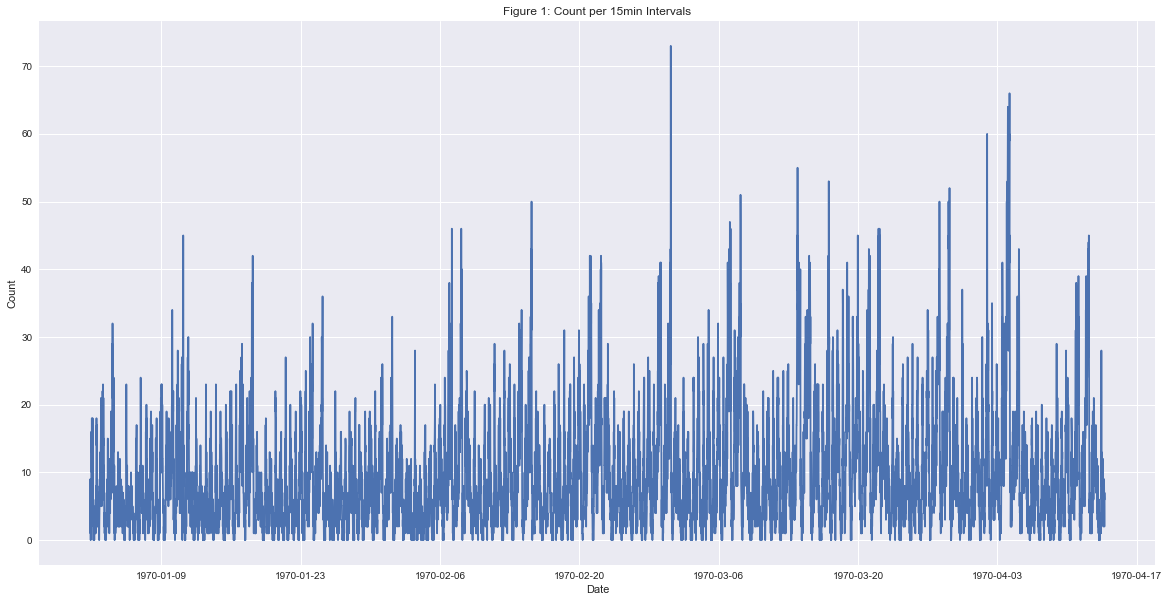

In [74]:
plt.figure(figsize=(20,10))
plt.plot(df_15min)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Figure 1: Count per 15min Intervals')
plt.show()

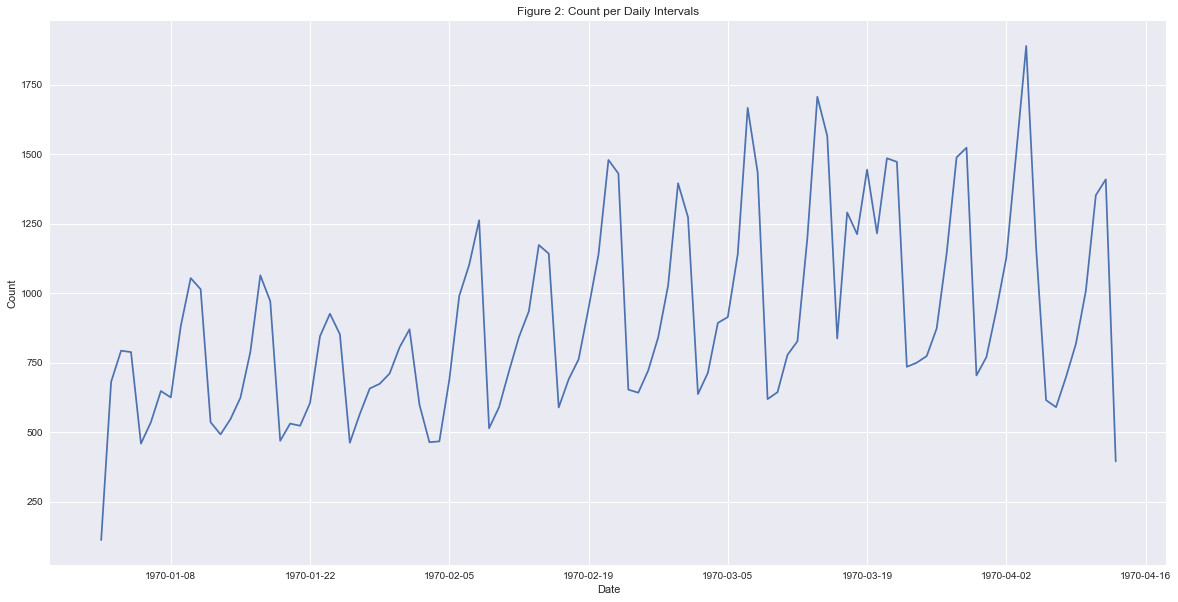

In [75]:
df_daily = df.resample('D').count()

plt.figure(figsize=(20,10))
plt.plot(df_daily)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Figure 2: Count per Daily Intervals')
plt.show()

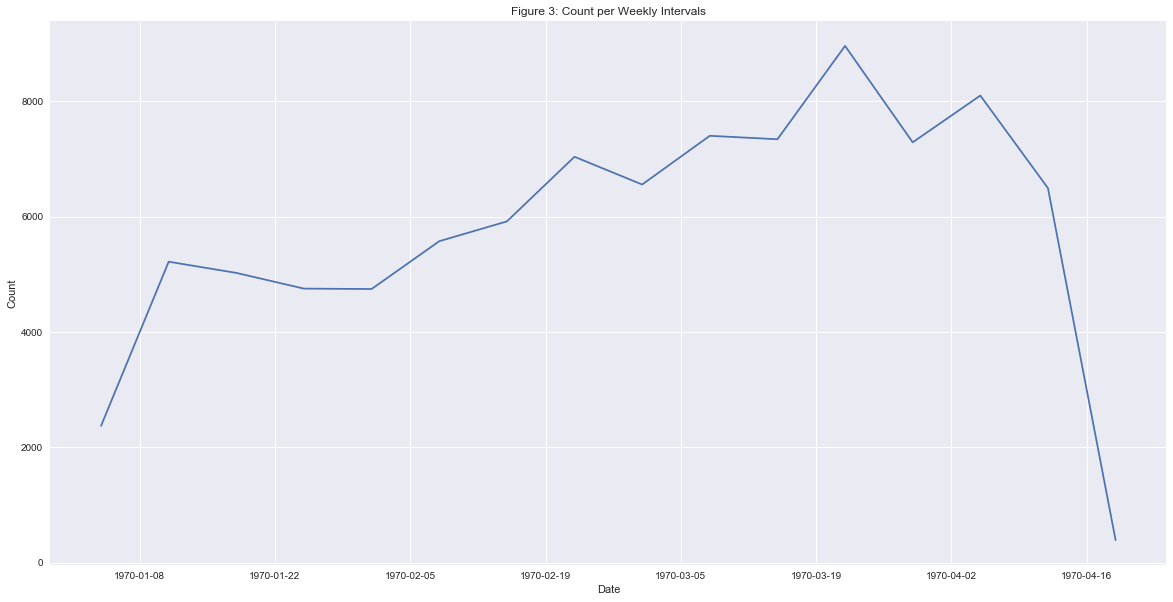

In [76]:
df_weekly = df.resample('W').count()

plt.figure(figsize=(20,10))
plt.plot(df_weekly)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Figure 3: Count per Weekly Intervals')
plt.show()

There is a general weekly periodic login activity, two peaks can be seen within each 2 week interval. Additionally, the login activities increase towards the beginning of April followed by a sharpe decline. Figure 1 reveals an unsual 15 min time period (between 1970-02-20 and 1970-03-06) that seems to be an outlier however Figure 2 shows that is does fit into the periodic cycle.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### Answer
The complimetary circadian rhythm does reveal that work times may differ between cities on weekdays, however similar on weekends. 

Diver partners are registered to one or more managing companies and as such these companies can be asked to register the tags of their active drivers with the toll company. With such registration completed the toll activity of the drivers can be monitored for trends in toll usage before and after the implimentation of toll re-imburstment. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br>
    a. how you will implement the experiment<br>
    b. what statistical test(s) you will conduct to verify the significance of the observation <br>
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Answer
Hypothesis testing can be perform with the null being that there's no difference in activity before and after. The alternative would be that there's a difference in usage. A two-tailed t test would be appropriate and the p-value can be used to identify the statistically significance and after which an evaluation of its practical significance. Recommendations can be made based on the resulting t-statistic. Further test can be performed to determine financial benefit to both cities measured against the present.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [124]:
# load json as string
udc = json.load((open('ultimate_data_challenge.json')))
udc_df = pd.DataFrame(udc)
udc_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [125]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [126]:
# Change date columns to datetime objects
udc_df.signup_date = pd.to_datetime(udc_df.signup_date)
udc_df.last_trip_date = pd.to_datetime(udc_df.last_trip_date)
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [129]:
# Fill missing values
udc_df['avg_rating_by_driver'].fillna(udc_df['avg_rating_by_driver'].mean(), inplace=True)
udc_df['avg_rating_of_driver'].fillna(udc_df['avg_rating_of_driver'].mean(), inplace=True)
udc_df['phone'].fillna(udc_df['phone'].mode(), inplace=True)

In [130]:
udc_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [131]:
# Determine the last date of record
report_date = max(udc_df.last_trip_date)
print('The last reported activity date is', report_date)

The last reported activity date is 2014-07-01 00:00:00


In [145]:
# Users active in last 30 days
active_days = udc_df.last_trip_date > (report_date - pd.Timedelta('30 day'))

# Calculate percent of active users
reten_rate = (len(udc_df[active_days])/len(udc_df))*100
print('The retention rate for users is ' + str(round(reten_rate, 3)) + '%.')

The retention rate for users is 36.62%.


2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

There are two classifiers that I would use for prediction. Logistic regression is a good classifier for identifying the best features in the model. Random forest would then be used to better predict retention using the best estimator of the gridsearch.

In [149]:
# Create an active coumn
udc_df['active'] = np.nan

udc_df.loc[active_days, 'active'] = 1

#Replace missing values in Active column
udc_df['active'].fillna(0, inplace=True)

In [225]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [217]:
p_var = ['phone', 'avg_dist', 'trips_in_first_30_days', 'ultimate_black_user', 'city']
X = np.array(pd.get_dummies(udc_df[p_var], drop_first= True))
y = np.array(pd.get_dummies(udc_df['active'], drop_first= True))

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)

In [227]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logregclf = LogisticRegression(random_state = 42)
logregclf.fit(X_train, y_train)


# Predicting the Test set results
y_pred = logregclf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision:', round(precision_score(y_test, y_pred), 3))
print('Recall   :', round(recall_score(y_test, y_pred), 3))
print('Accuracy :', round(accuracy_score(y_test, y_pred), 3))
print('Classification Report: \n', classification_report(y_test, y_pred))
logregclf.coef_

[[6780 1162]
 [2292 2266]]
Precision: 0.661
Recall   : 0.497
Accuracy : 0.724
Classification Report: 
              precision    recall  f1-score   support

          0       0.75      0.85      0.80      7942
          1       0.66      0.50      0.57      4558

avg / total       0.72      0.72      0.71     12500



array([[-0.21230173,  0.4610515 ,  0.43259248,  0.53651366,  0.70204117,
         0.28143452]])

In [220]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

# Compute cross-validated AUC scores
cv_auc = cross_val_score(logregclf, X, y, cv = 5,scoring = 'roc_auc')

print("5-fold cross-validation AUC score: {}".format(cv_auc))

AUC: 0.6754185594573382
5-fold cross-validation AUC score: [0.7697406  0.76455735 0.75823432 0.7660805  0.77323243]


In [210]:
pd.get_dummies(udc_df[p_var], drop_first= True).head()

,avg_dist,trips_in_first_30_days,ultimate_black_user,phone_iPhone,city_King's Landing,city_Winterfell
0,3.67,4,True,1,1,0
1,8.26,0,False,0,0,0
2,0.77,3,False,1,0,0
3,2.36,9,True,1,1,0
4,3.13,14,False,0,0,1


In [214]:
def ROC(X, y, c, r):
#makes cross_validation for given parameters C,r and Returns averaged FPR, TPR
    dic_weight = {1:len(y)/(r*np.sum(y)), 0:len(y)/(len(y)-r*np.sum(y))} 
    lrn = LogisticRegression(penalty = 'l2', C = c, class_weight = dic_weight)
    
    #how much k-fold
    N = 5 
    #repeat how often (taking the mean)
    N_iter = 3    
    mean_tpr = 0.0
    mean_thresh = 0.0
    mean_fpr = np.linspace(0, 1, 50000)
    

    for it in range(N_iter):
        skf = StratifiedKFold(n_splits = N, shuffle = True)
        for train_index, test_index in skf.split(X, y):
            X_train, y_train = X[train_index], y[train_index]
            X_test, y_test = X[test_index], y[test_index]
         
            lrn.fit(X_train, y_train)
            y_prob = lrn.predict_proba(X_test)[:,lrn.classes_[1]]
            
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            mean_tpr += np.interp(mean_fpr, fpr, tpr)
            mean_thresh += np.interp(mean_fpr, fpr, thresholds)
            mean_tpr[0] = 0.0

    mean_tpr /= (N*N_iter)
    mean_thresh /= (N*N_iter)
    mean_tpr[-1] = 1.0
    return mean_fpr, mean_tpr, roc_auc_score(y_test, y_prob), mean_thresh

def plot_roc(X,y, list_par_1, par_1 = 'C', par_2 = 1):

    f = plt.figure(figsize = (12,8));
    for p in list_par_1:
        if par_1 == 'C':
            c = p
            r = par_2
        else:
            r = p
            c = par_2
        list_FP, list_TP, AUC, mean_thresh = ROC(X, y, c, r)      
        plt.plot(list_FP, list_TP, label = 'C = {}, AUC = {:.4f}'.format(c,AUC));
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(title = 'values', loc='lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC detail')
    plt.show()
    plt.close()

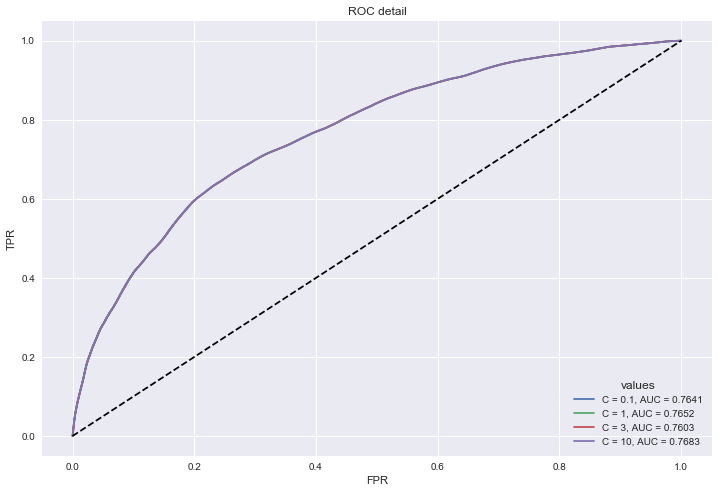

In [215]:
plot_roc(X,y, [0.1, 1, 3, 10], 'C', 1)

In [228]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2, 
                                    min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=1,
                                    oob_score=False, random_state=1, verbose=0, warm_start=False)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision:', round(precision_score(y_test, y_pred), 3))
print('Recall   :', round(recall_score(y_test, y_pred), 3))
print('Accuracy :', round(accuracy_score(y_test, y_pred), 3))
print('Classification Report: \n', classification_report(y_test, y_pred))

[[6933 1009]
 [2181 2377]]
Precision: 0.702
Recall   : 0.522
Accuracy : 0.745
Classification Report: 
              precision    recall  f1-score   support

          0       0.76      0.87      0.81      7942
          1       0.70      0.52      0.60      4558

avg / total       0.74      0.74      0.73     12500



In [191]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# Fit the grid search model
grid_search.fit(X_train,y_train)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

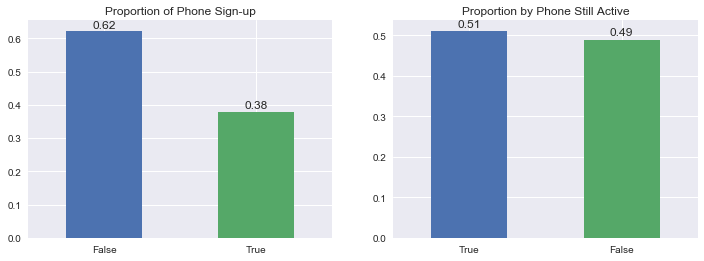

In [203]:
plt.figure(figsize=(12,4))

# Proportion of Ultimate Black User
plt.subplot(1,2,1)
udc_df['ultimate_black_user'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion of Phone Sign-up')

#Add labels
x = list(round(udc_df['ultimate_black_user'].value_counts(normalize=True), 2).index)
y = round(udc_df['ultimate_black_user'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')
    
# Proportion of Ultimate Black User Still Active
plt.subplot(1,2,2)
udc_df[udc_df['active'] ==1]['ultimate_black_user'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion by Phone Still Active')

#Add labels
x = list(round(udc_df[udc_df['active'] ==1]['ultimate_black_user'].value_counts(normalize=True), 2).index)
y = round(udc_df[udc_df['active'] ==1]['ultimate_black_user'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')

Being an ultimate black user increases the porbability of retention. Ultimate can provide incentives for becoming an ultimate black user. 

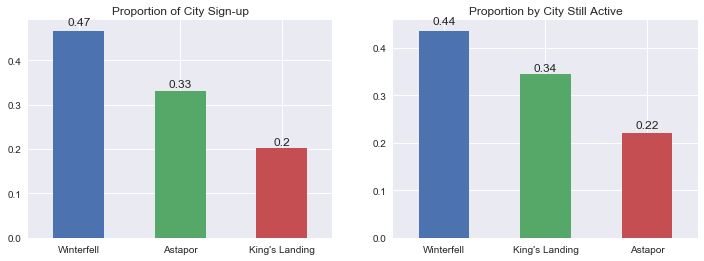

In [201]:
plt.figure(figsize=(12,4))

# Proportion of City
plt.subplot(1,2,1)
udc_df['city'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion of City Sign-up')

#Add labels
x = list(round(udc_df['city'].value_counts(normalize=True), 2).index)
y = round(udc_df['city'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')
    
# Proportion of City
plt.subplot(1,2,2)
udc_df[udc_df['active'] ==1]['city'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion by City Still Active')

#Add labels
x = list(round(udc_df[udc_df['active'] ==1]['city'].value_counts(normalize=True), 2).index)
y = round(udc_df[udc_df['active'] ==1]['city'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')

The sign ups for King's Landing have a higher rate of retention. A further studny can be done to identify differences between the cities to better impact retention in the other cities. Marketing campaigns could be implimented in the other cities to improve user retention. Partner driver training programs could teach good customer service. 

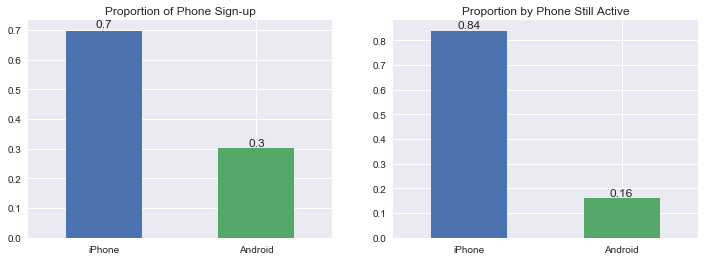

In [202]:
plt.figure(figsize=(12,4))

# Proportion of Phone
plt.subplot(1,2,1)
udc_df['phone'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion of Phone Sign-up')

#Add labels
x = list(round(udc_df['phone'].value_counts(normalize=True), 2).index)
y = round(udc_df['phone'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')
    
# Proportion of Phone
plt.subplot(1,2,2)
udc_df[udc_df['active'] ==1]['phone'].value_counts(normalize=True).plot.bar(rot=0)

plt.title('Proportion by Phone Still Active')

#Add labels
x = list(round(udc_df[udc_df['active'] ==1]['phone'].value_counts(normalize=True), 2).index)
y = round(udc_df[udc_df['active'] ==1]['phone'].value_counts(normalize=True), 2)
x_pos = [i for i, _ in enumerate(x)]

for a, b in zip(x_pos,y):
    plt.text(a, b + 0.01, b, ha='center')

It seems as though iPhone users have a better app experience and therefore the app improvement of Android users may influence retention. 